In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
import scipy
from scipy import signal

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    # Source: https://github.com/guillaume-chevalier/filtering-stft-and-laplace-transform
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [44]:
wx = pd.read_csv('/Users/zachkeskinen/Documents/temp/data/wx/ex/312_1_WEEK=2023-04-03.csv', skiprows = 3, parse_dates = True)
wx['dt'] = pd.to_datetime(wx['Date'] + 'T' + wx['Time'])
wx = wx.set_index('dt')
temps = wx['TOBS.I-1 (degC) ']

In [80]:
high_temps = butter_lowpass_filter(temps, 2, 24)

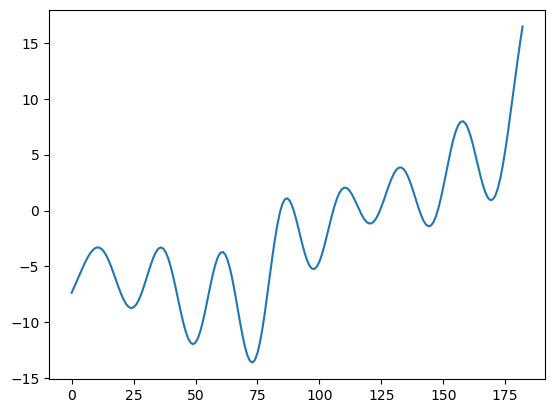

In [81]:
plt.plot(high_temps)

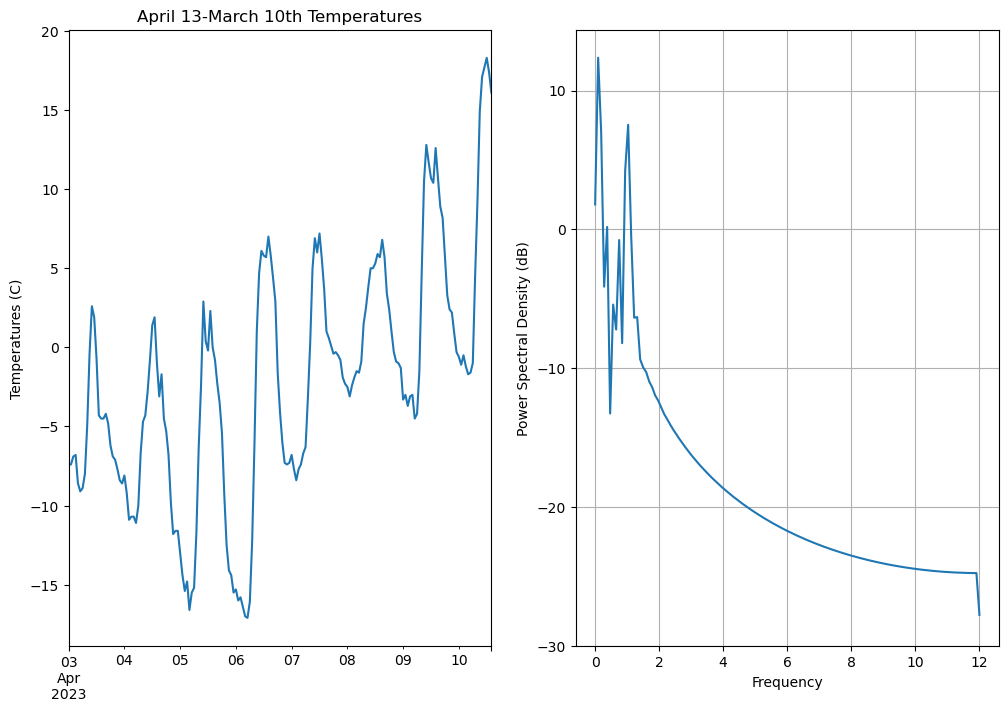

In [82]:
fig, axes = plt.subplots(1, 2, figsize = (12, 8))
temps.plot(ax = axes[0])
axes[0].set_ylabel('Temperatures (C)')
axes[0].set_xlabel('')
axes[0].set_title('April 13-March 10th Temperatures')

axes[1].psd(high_temps, Fs = 24, scale_by_freq = False, detrend = 'mean')
plt.show()


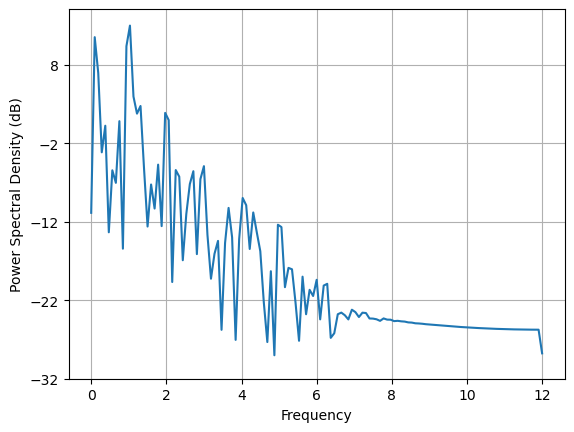

In [72]:
plt.psd(high_temps, Fs = 24, scale_by_freq = False)
plt.show()